<h2><font color=blue>Desafío técnico Etermax </h2><br><h3><strong>Objetivo</strong> </h3><br>El objetivo del ejercicio es hacer un análisis del dataset y presentar insights y accionables que el candidato considere valiosos.<br>Autor: <strong>Rodolfo Pardo</strong></font>

---------

<h2>First step: Data Exploration</h2>

In [58]:
#Se importan las librerías necesarias para el estudio

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Se lee dataset 

juego = pd.read_csv('dataset.csv')

In [3]:
#Se conoce las dimensiones de nuestro dataset

print('Tenemos un dataset de {} filas con {} variables para analizar'.format(juego.shape[0], juego.shape[1]))

Tenemos un dataset de 20000 filas con 14 variables para analizar


In [4]:
#Se conocen los tipos de datasets presentes 

juego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 20000 non-null  object
 1   install_time            20000 non-null  object
 2   platform                20000 non-null  object
 3   country_region          19521 non-null  object
 4   city                    19065 non-null  object
 5   gender                  20000 non-null  object
 6   min_age_range           20000 non-null  int64 
 7   max_age_range           20000 non-null  int64 
 8   event_1                 20000 non-null  int64 
 9   event_2                 20000 non-null  int64 
 10  event_3                 20000 non-null  int64 
 11  event_4                 20000 non-null  int64 
 12  event_5                 20000 non-null  int64 
 13  target_churn_indicator  20000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 2.1+ MB


<p>Podemos observar un <strong>dataset</strong> que contiene columnas con tipos de datos <strong><font color=red>incorrectos</font></strong> tales como install_time 

In [5]:
#Estadistica descriptiva de las principales variables cuantitativas del dataset

juego.describe()

,min_age_range,max_age_range,event_1,event_2,event_3,event_4,event_5,target_churn_indicator
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,16.145300,18.884050,13.751700,18.80975,0.526850,4.341200,4.452500,0.540700
std,2.420017,1.450452,19.041115,26.93790,1.245695,4.218456,4.506946,0.498353
min,13.000000,13.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,17.000000,2.000000,3.00000,0.000000,1.000000,2.000000,0.000000
50%,18.000000,20.000000,6.000000,9.00000,0.000000,3.000000,3.000000,1.000000
75%,18.000000,20.000000,18.000000,24.00000,1.000000,6.000000,6.000000,1.000000
max,21.000000,20.000000,218.000000,437.00000,20.000000,56.000000,64.000000,1.000000


<p>A simple vista, podemos observar que los datos de las variables <strong>min_age_range</strong> y <strong>max_age_range</strong> se concentran entre los 16 y 21 con desviaciones standar mínimas. <br>
<p>No así en los <strong>eventos</strong>, que podemos observar algunos valores outliers que vamos a poder estudiar y visualizar en gráficos de caja <p>

In [6]:
#Observamos el nombre de las columnas 

juego.columns

Index(['user_id', 'install_time', 'platform', 'country_region', 'city',
       'gender', 'min_age_range', 'max_age_range', 'event_1', 'event_2',
       'event_3', 'event_4', 'event_5', 'target_churn_indicator'],
      dtype='object')

In [7]:
#Encontrar valores nulos 

juego.isnull().sum()

user_id                     0
install_time                0
platform                    0
country_region            479
city                      935
gender                      0
min_age_range               0
max_age_range               0
event_1                     0
event_2                     0
event_3                     0
event_4                     0
event_5                     0
target_churn_indicator      0
dtype: int64

In [8]:
#Encontrando porcentajes de valores nulos 

juego.isnull().sum()/len(juego.index)

user_id                   0.00000
install_time              0.00000
platform                  0.00000
country_region            0.02395
city                      0.04675
gender                    0.00000
min_age_range             0.00000
max_age_range             0.00000
event_1                   0.00000
event_2                   0.00000
event_3                   0.00000
event_4                   0.00000
event_5                   0.00000
target_churn_indicator    0.00000
dtype: float64

<p>Se observa dos columnas con presencia de valores nulos:
<ol>
    <li><strong>country_region:</strong> 2,3% de sus valores son nulos</li>
    <li><strong>city:</strong> 4,6% de sus valores son nulos</li>
</ol>
<p><strong>Las dos columnas son de geolocalización del jugador y sus valores nulos no resultan significantes ante la muestra por lo que no vamos a eliminar</strong></p>

In [9]:
#Presencia de valores duplicados

print("Valores duplicados en nuestro dataset: {}".format(juego.duplicated(subset=None, keep=False).sum()))

Valores duplicados en nuestro dataset: 0


In [10]:
#Visualización de primeros valores en el dataset

juego.head()

,user_id,install_time,platform,country_region,city,gender,min_age_range,max_age_range,event_1,event_2,event_3,event_4,event_5,target_churn_indicator
0,2ba6f357,2018-07-04 19:24:24,Android,Santa Cruz,Río Gallegos,male,13,17,1,2,0,1,1,0
1,3cb936c1,2018-06-30 13:41:29,Android,Corrientes,Corrientes,male,13,17,0,7,0,3,0,1
2,17d88bbc,2018-06-30 16:02:30,Android,Cordoba,Villa Carlos Paz,female,18,20,2,1,0,2,2,1
3,7baa10b6,2018-07-02 21:08:33,Android,Buenos Aires,Don Torcuato,female,13,17,5,6,0,2,5,0
4,120d379,2018-07-07 04:18:47,Android,Santiago del Estero,Santiago del Estero,female,13,17,8,12,0,2,3,0


In [11]:
#Visualización de los últimos valores en el dataset

juego.tail()

,user_id,install_time,platform,country_region,city,gender,min_age_range,max_age_range,event_1,event_2,event_3,event_4,event_5,target_churn_indicator
19995,554e1347,2018-07-07 02:19:19,Android,Santa Fe,Aaron Castellanos,female,18,20,23,54,2,9,3,0
19996,795f035e,2018-07-05 18:49:59,Android,Santa Cruz,Caleta Olivia,male,18,20,37,45,1,6,6,0
19997,52acf7f9,2018-07-05 03:22:13,Android,Salta,Salta,female,13,17,3,4,0,1,3,1
19998,1674efa,2018-07-07 05:22:36,Android,Buenos Aires,Florencio Varela,male,13,17,54,62,2,17,14,0
19999,fb832bfb,2018-07-02 03:56:24,Android,Santiago del Estero,Santiago del Estero,female,13,17,20,20,1,6,7,0


----------

<h2>Second step: Data Cleaning</h2>

<h5>Columna user_id</h5>

In [12]:
print("User id únicos: {}".format(juego.user_id.nunique()))

User id únicos: 18533


In [13]:
print("User id totales en dataset: {}".format(juego.user_id.count()))

User id totales en dataset: 20000


<h5>Columna install_time</h5>

In [14]:
#Tipo de columna

juego.install_time.dtype

dtype('O')

In [15]:
#Estamos cambiando la info de objetc a datetime como corresponde

juego['install_time'] = pd.to_datetime(juego['install_time'], format = "%Y-%m-%d %H:%M:%S")

In [16]:
#Chequeamos que esté bien 

if juego['install_time'].dtype == "<M8[ns]":
    print('Cambio ejecutado ok')
else:
    print('Cambio no ejecutado. Revisar código')

Cambio ejecutado ok


In [17]:
#Se procede a crear columnas para poder estudiar de forma posterior meses y horas del dataset

juego['month'] = pd.DatetimeIndex(juego['install_time']).month
juego['hour'] = pd.DatetimeIndex(juego['install_time']).hour

In [18]:
#Chequeamos que se produzcan los datos 

juego.info()

#A estas columnas las dejo como entero por ser de mi interes que queden asi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 20000 non-null  object        
 1   install_time            20000 non-null  datetime64[ns]
 2   platform                20000 non-null  object        
 3   country_region          19521 non-null  object        
 4   city                    19065 non-null  object        
 5   gender                  20000 non-null  object        
 6   min_age_range           20000 non-null  int64         
 7   max_age_range           20000 non-null  int64         
 8   event_1                 20000 non-null  int64         
 9   event_2                 20000 non-null  int64         
 10  event_3                 20000 non-null  int64         
 11  event_4                 20000 non-null  int64         
 12  event_5                 20000 non-null  int64 

<h5>Columna platform </h5>

In [19]:
juego.platform.value_counts()

Android    19512
iOS          488
Name: platform, dtype: int64

<p>No se observan problemas de nomenclatura, hay dos categorías correctamente identificables para su analisis</p>

<h5>Columna Country Region</h5>

In [20]:
juego.country_region.value_counts()

Buenos Aires           6831
Buenos Aires F.D.      3115
Cordoba                1898
Entre Rios             1138
Santa Fe                884
Tucuman                 782
Mendoza                 686
Salta                   684
Chaco                   391
Misiones                355
Corrientes              331
Neuquen                 259
Santiago del Estero     234
San Luis                234
Formosa                 212
La Rioja                208
Rio Negro               207
San Juan                200
Jujuy                   189
Chubut                  180
La Pampa                164
Catamarca               140
Santa Cruz              103
Tierra del Fuego         70
Entre Ríos Province      15
Santa Fe Province         2
Cordoba Province          2
Neuquén Province          2
Chubut Province           1
Chaco Province            1
Salta Province            1
Río Negro Province        1
Tucumán Province          1
Name: country_region, dtype: int64

In [21]:
#Funcion a utilizar posteriormente

def reemplaza_variables(x,y,z):
    juego[x] = juego[x].str.replace(y, z)

In [22]:
#Se corrigen errores en cuanto a la nomenclatura de distintos datos para unificar y poder analizar luego correctamente

reemplaza_variables('country_region', 'Buenos Aires F.D.', 'CABA')
reemplaza_variables('country_region', 'Entre Ríos Province', 'Entre Rios')
reemplaza_variables('country_region', 'Neuquén Province', 'Neuquen')
reemplaza_variables('country_region', 'Santa Fe Province', 'Santa Fe')
reemplaza_variables('country_region', 'Cordoba Province', 'Cordoba')
reemplaza_variables('country_region', 'Río Negro Province', 'Rio Negro')
reemplaza_variables('country_region', 'Chubut Province', 'Chubut')
reemplaza_variables('country_region', 'Chaco Province', 'Chaco')
reemplaza_variables('country_region', 'Salta Province', 'Salta')
reemplaza_variables('country_region', 'Tucumán Province', 'Tucuman')

In [23]:
juego.country_region.value_counts().count()

24

<p><strong>24</strong> son las provincias a analizar en el país por lo que estaríamos en el número correcto para el análisis</p>

<h5>Columna city</h5>

In [24]:
juego.city.value_counts()

Buenos Aires             2626
Córdoba                  1188
Villa Angelica            751
San Miguel de Tucumán     675
Salta                     597
                         ... 
Inriville                   1
Los Sarmientos              1
Uspallata                   1
Villa Yacanto               1
Hughes                      1
Name: city, Length: 772, dtype: int64

<p>En esta columna se observa la nomenclatura de las ciudades de forma correcta, por lo que se decide continuar con la siguiente<p>

<h5>Columna género</h5>

In [25]:
juego.gender.value_counts()

female     10835
male        8992
unknown      173
Name: gender, dtype: int64

<p>En esta columna, los denominados <strong>unknown</strong> son aceptables aunque también podrían ser considerados como valores nulos en un análisis estricto de la información. En este proyecto <strong> no lo vamos a considerar como valores nulos </strong>

### En columnas numéricas de nuestro dataset mostradas a continuación, no se observan anomalías o presencia de valores extraños que no sean los deseables en la muestra

In [26]:
juego.min_age_range.value_counts()

18    12546
13     7430
21       17
20        4
17        3
Name: min_age_range, dtype: int64

In [27]:
juego.max_age_range.value_counts()

20    12561
17     7436
18        2
13        1
Name: max_age_range, dtype: int64

In [28]:
juego.event_1.value_counts()

1      1936
3      1857
2      1797
0      1470
4      1252
       ... 
165       1
133       1
164       1
179       1
135       1
Name: event_1, Length: 161, dtype: int64

In [29]:
juego.event_2.value_counts()

0      1633
1      1392
2      1298
3      1291
4      1043
       ... 
214       1
278       1
223       1
247       1
183       1
Name: event_2, Length: 216, dtype: int64

In [30]:
juego.event_3.value_counts()

0     14918
1      2646
2      1144
3       583
4       315
5       161
6        92
7        53
8        39
9        16
10        9
12        9
11        6
20        2
13        2
14        1
18        1
17        1
16        1
15        1
Name: event_3, dtype: int64

In [31]:
juego.event_5.value_counts()

3     3370
2     3171
1     3154
4     2135
5     1491
0     1443
6     1138
7      857
8      646
9      496
10     379
11     305
12     249
13     197
14     177
16     137
15     121
18      79
17      79
19      73
20      50
21      35
24      32
23      31
22      31
26      26
25      17
27      16
28      13
30      10
32       7
29       5
38       4
31       4
35       3
36       2
39       2
33       2
42       2
48       2
43       2
51       1
50       1
34       1
40       1
64       1
46       1
47       1
Name: event_5, dtype: int64

In [32]:
juego.target_churn_indicator.value_counts()

1    10814
0     9186
Name: target_churn_indicator, dtype: int64

------

<h2>Data Insights</h2>

<h3><font color=blue>Time Series</font></h3>

In [35]:
#Primeros valores

juego.head()

,user_id,install_time,platform,country_region,city,gender,min_age_range,max_age_range,event_1,event_2,event_3,event_4,event_5,target_churn_indicator,month,hour
0,2ba6f357,2018-07-04 19:24:24,Android,Santa Cruz,Río Gallegos,male,13,17,1,2,0,1,1,0,7,19
1,3cb936c1,2018-06-30 13:41:29,Android,Corrientes,Corrientes,male,13,17,0,7,0,3,0,1,6,13
2,17d88bbc,2018-06-30 16:02:30,Android,Cordoba,Villa Carlos Paz,female,18,20,2,1,0,2,2,1,6,16
3,7baa10b6,2018-07-02 21:08:33,Android,Buenos Aires,Don Torcuato,female,13,17,5,6,0,2,5,0,7,21
4,120d379,2018-07-07 04:18:47,Android,Santiago del Estero,Santiago del Estero,female,13,17,8,12,0,2,3,0,7,4


In [37]:
#Seteamos la fecha como index

juego_index = juego.set_index('install_time')

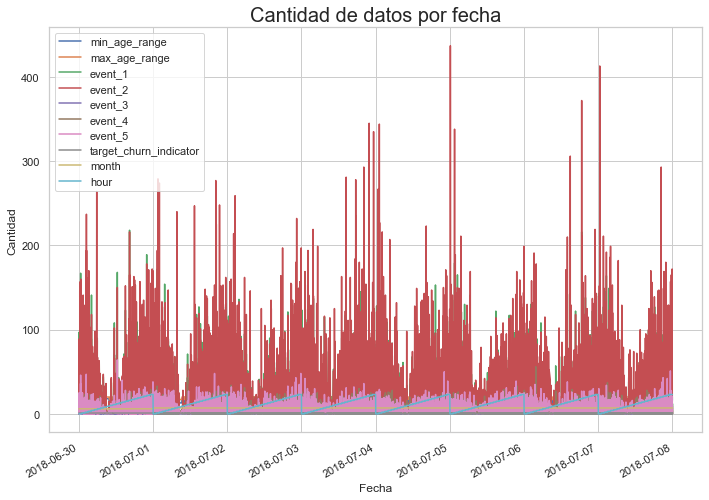

In [59]:
#Ploteamos con matplotlib

juego_index.plot()
plt.title('Cantidad de datos por fecha', fontsize= 20)
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.show()

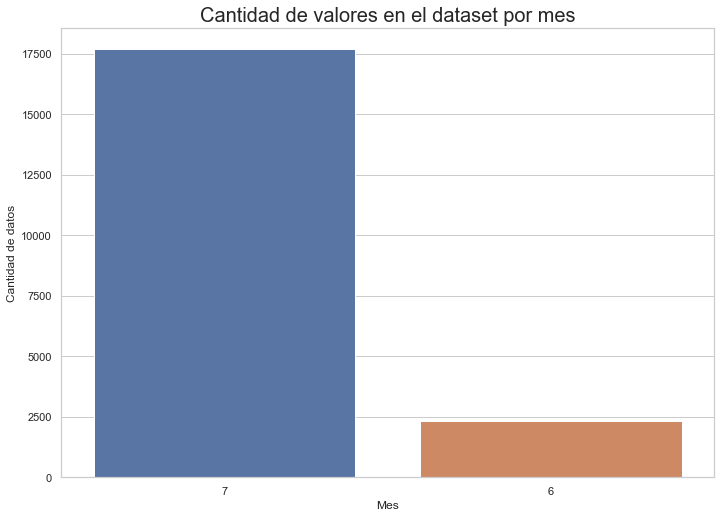

In [60]:
#Grafico de barras por seaborn

sns.countplot(x = "month",
             data = juego,
             order = juego['month'].value_counts().index)
plt.title('Cantidad de valores en el dataset por mes', fontsize = 20)
plt.xlabel('Mes')
plt.ylabel('Cantidad de datos')
plt.show()


In [46]:
#Proporción de los datos

juego.month.value_counts(normalize = True)

7    0.8846
6    0.1154
Name: month, dtype: float64

<p>Se puede observar que nuestro dataset solo contiene datos correspondientes a los meses de Junio y Julio. Entendiendo el contexto, se observa un patrón de actividad similar durante estos 9 días de análisis con crecimientos el día Jueves 5 de Julio y el día Sábado 7 de Julio</p><br>
<p>El 88% de nuestros datos se concentran en el mes de Julio mientras que el 12% sucedieron en el mes de Junio</p>


In [52]:
#Veamos horas 

horas_juego = juego.groupby('hour')['user_id'].count().to_frame()

In [55]:
#Reseteamos index

horas_juego = horas_juego.reset_index()

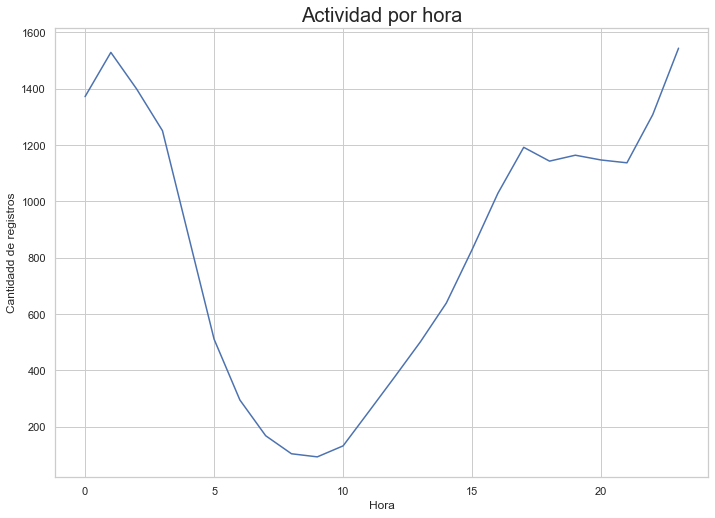

In [64]:
#Grafico de lineas

sns.lineplot(data = horas_juego, x = 'hour', y = 'user_id')
plt.title('Actividad por hora', fontsize = 20)
plt.xlabel('Hora')
plt.ylabel('Cantidadd de registros')
plt.show()

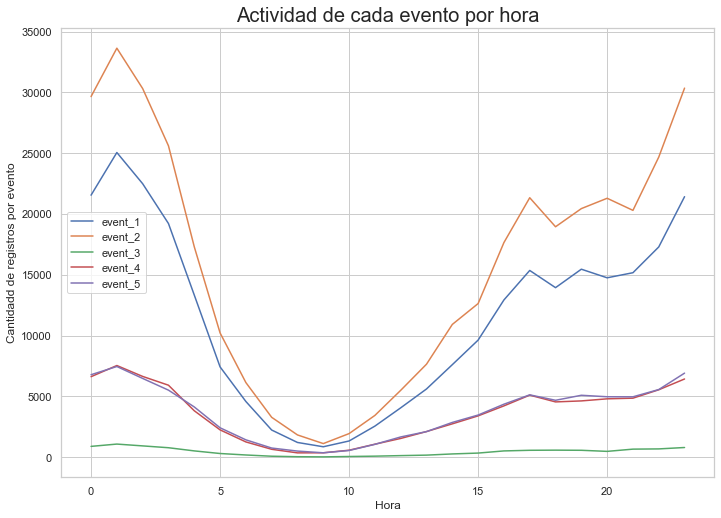

In [65]:
#Agrupamiento de eventos por hora

juego.groupby('hour')[['event_1', "event_2", 'event_3', 'event_4', 'event_5']].sum().plot()
plt.title('Actividad de cada evento por hora', fontsize = 20)
plt.xlabel('Hora')
plt.ylabel('Cantidadd de registros por evento')
plt.show()

In [68]:
#Estadistica descriptiva 

juego.groupby('hour')[['event_1', "event_2", 'event_3', 'event_4', 'event_5']].agg([np.sum, np.max, np.min, np.mean])

event_1                      event_2                      event_3       \
         sum amax amin       mean     sum amax amin       mean     sum amax   
hour                                                                          
0      21550  167    0  15.706997   29663  437    0  21.620262     882   10   
1      25061  179    0  16.390451   33646  344    0  22.005232    1071   18   
2      22494  165    0  16.078628   30325  274    0  21.676197     922   11   
3      19218  154    0  15.362110   25613  219    0  20.474021     771   16   
4      13334  141    0  15.135074   17306  207    0  19.643587     510   12   
5       7423  111    0  14.526419   10218  264    0  19.996086     295   14   
6       4575  141    0  15.508475    6133  182    0  20.789831     174    9   
7       2227  115    0  13.255952    3273  240    0  19.482143      72    4   
8       1204   74    0  11.576923    1823   90    0  17.528846      32    4   
9        850  113    0   9.139785    1112  114    0  11.956989      19    3   
10      1326   57    0  10.045455    1934  125    0  14.651515      49    4   
11      2550  108    0  10.039370    3430  125    0  13.503937      77    5   
12      4054  168    0  10.753316    5494  163    0  14.572944     122    7   
13      5606   97    0  11.167331    7645  247    0  15.229084     162    8   
14      7605  142    0  11.901408   10916  306    0  17.082942     260   10   
15      9626  123    0  11.611580   12633  162    0  15.238842     331    7   
16     12930  218    0  12.565598   17652  223    0  17.154519     508    9   
17     15357  116    0  12.883389   21341  278    0  17.903523     560    9   
18     13942  216    0  12.197725   18952  372    0  16.580927     571   20   
19     15460  153    0  13.281787   20446  172    0  17.565292     560   12   
20     14753  210    0  12.862249   21296  293    0  18.566696     471   13   
21     15171  189    0  13.343008   20301  345    0  17.854881     655   20   
22     17291  154    0  13.219419   24684  232    0  18.871560     674   13   
23     21427  149    0  13.877591   30359  335    0  19.662565     789   12   

                    event_4                     event_5                      
     amin      mean     sum amax amin      mean     sum amax amin      mean  
hour                                                                         
0       0  0.642857    6615   28    0  4.821429    6778   46    0  4.940233  
1       0  0.700458    7535   34    0  4.928058    7454   42    0  4.875082  
2       0  0.659042    6638   37    0  4.744818    6473   47    0  4.626876  
3       0  0.616307    5915   56    0  4.728217    5509   35    0  4.403677  
4       0  0.578888    3813   26    0  4.328036    4127   35    0  4.684449  
5       0  0.577299    2240   31    0  4.383562    2411   30    0  4.718200  
6       0  0.589831    1248   26    1  4.230508    1420   28    0  4.813559  
7       0  0.428571     642   22    1  3.821429     745   23    0  4.434524  
8       0  0.307692     347   15    1  3.336538     495   20    0  4.759615  
9       0  0.204301     354   13    1  3.806452     354   14    0  3.806452  
10      0  0.371212     567   27    1  4.295455     542   18    0  4.106061  
11      0  0.303150    1062   43    1  4.181102    1049   27    0  4.129921  
12      0  0.323607    1534   25    1  4.068966    1658   64    0  4.397878  
13      0  0.322709    2102   23    1  4.187251    2096   27    0  4.175299  
14      0  0.406886    2736   21    0  4.281690    2852   40    0  4.463224  
15      0  0.399276    3392   29    1  4.091677    3460   28    0  4.173703  
16      0  0.493683    4214   26    0  4.095238    4352   32    0  4.229349  
17      0  0.469799    5098   29    0  4.276846    5122   27    0  4.296980  
18      0  0.499563    4541   30    1  3.972878    4675   31    0  4.090114  
19      0  0.481100    4623   26    0  3.971649    5087   48    0  4.370275  
20      0  0.410636    4794   27    1  4.179599    4965   43    0  4.328684  

In [69]:
#Guardo tabla

juego.groupby('hour')[['event_1', "event_2", 'event_3', 'event_4', 'event_5']].agg([np.sum, np.max, np.min, np.mean]).to_csv("eventos_por_hora.csv")

--------

<h3>Plataforma</h3>

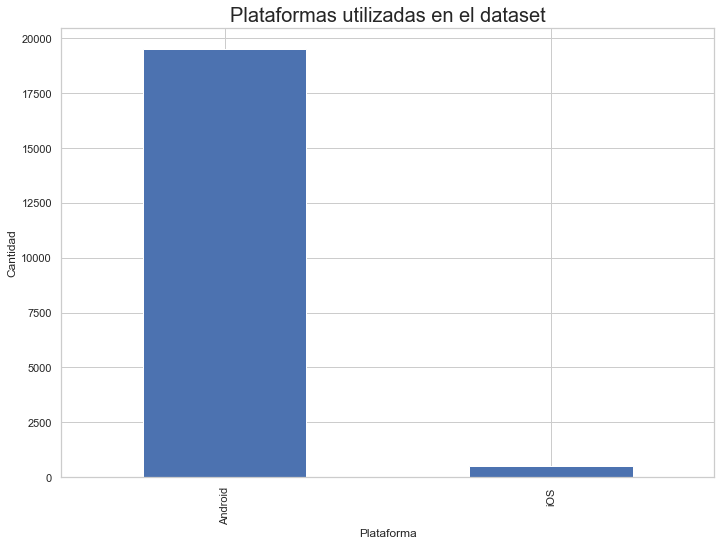

In [73]:
juego.platform.value_counts().plot.bar()
plt.title('Plataformas utilizadas en el dataset', fontsize = 20)
plt.xlabel('Plataforma')
plt.ylabel('Cantidad')
plt.show()

In [75]:
juego.platform.value_counts(normalize = True)

Android    0.9756
iOS        0.0244
Name: platform, dtype: float64

<p>El <strong>98%</strong> de los datos se ejecutaron en plataforma Android, algo esperable frente al mercado mientras que el <strong>2%</strong> restante corresponde a iOS</p>

<h3>Country Region</h3>

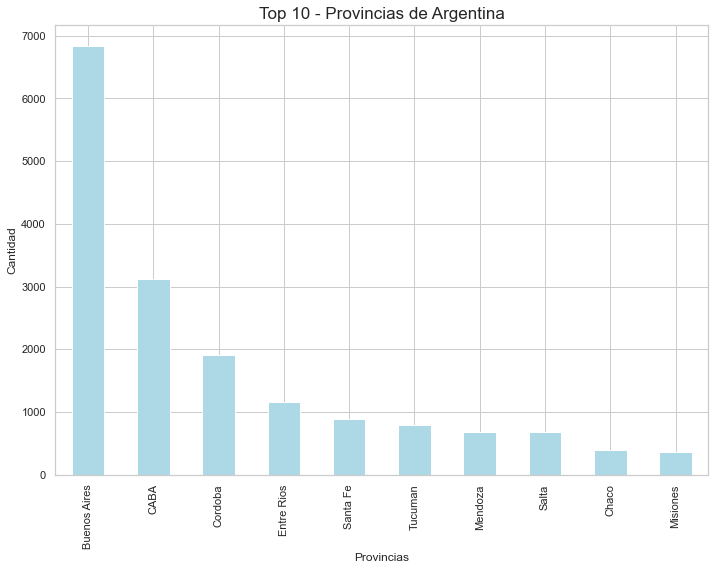

In [92]:
#Top 10 provincias de mayor presencia

juego['country_region'].value_counts().head(10).plot.bar(color = "lightblue")
plt.title('Top 10 - Provincias de Argentina', fontsize = 17)
plt.xlabel('Provincias')
plt.ylabel('Cantidad')
plt.show()

In [93]:
juego['country_region'].value_counts(normalize = True)

Buenos Aires           0.349931
CABA                   0.159572
Cordoba                0.097331
Entre Rios             0.059065
Santa Fe               0.045387
Tucuman                0.040111
Mendoza                0.035142
Salta                  0.035090
Chaco                  0.020081
Misiones               0.018186
Corrientes             0.016956
Neuquen                0.013370
Santiago del Estero    0.011987
San Luis               0.011987
Formosa                0.010860
La Rioja               0.010655
Rio Negro              0.010655
San Juan               0.010245
Jujuy                  0.009682
Chubut                 0.009272
La Pampa               0.008401
Catamarca              0.007172
Santa Cruz             0.005276
Tierra del Fuego       0.003586
Name: country_region, dtype: float64

<p>El <strong>34%</strong> de nuestros datos corresponden a Buenos Aires provincia mientras que CABA tiene un <strong>15%</strong>. Le siguen Córdoba, Entre Ríos, Santa Fe, Tucumán y Mendoza. <br>
    La provincia que menor representación tiene en este dataset es <strong>Tierra del Fuego</strong>

### Tenemos una pregunta... tendrán las provincias patrones similares en cuanto a la hora del día en al que juegan? ... Lo vemos tomando una provincia por región del país en estudio

In [97]:
#Filtro provincias

provincias = juego[(juego['country_region'] == "Buenos Aires") | (juego['country_region'] == "Cordoba") |
     (juego['country_region'] == "Mendoza") | (juego['country_region'] == "Tucuman") | (juego['country_region'] == "Chubut")]

In [98]:
#Formato

provincias.shape

(10381, 16)

In [99]:
#Chequeo que el filtro este ok

provincias['country_region'].value_counts()

Buenos Aires    6831
Cordoba         1900
Tucuman          783
Mendoza          686
Chubut           181
Name: country_region, dtype: int64

In [107]:
#Se agrupa

horas_provincia = provincias.groupby(['country_region', 'hour'])['user_id'].count().to_frame()

In [108]:
#Se resetea index

horas_provincia = horas_provincia.reset_index()

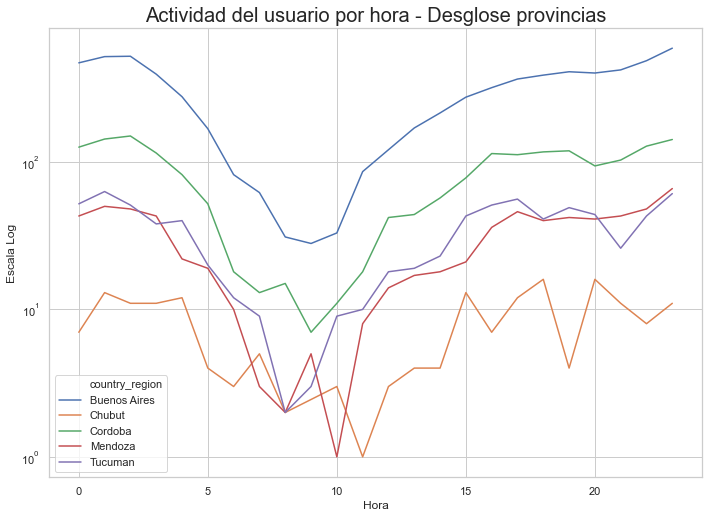

In [115]:
#Se grafica para evaluar tendencias
#Se lo hace en escala logaritmica para que todos tengan una representación

grafico = sns.lineplot(data = horas_provincia, x = "hour", y = "user_id", hue="country_region")
grafico.set(yscale = "log")
plt.title('Actividad del usuario por hora - Desglose provincias', fontsize = 20)
plt.xlabel('Hora')
plt.ylabel('Escala Log')
plt.show()

<p> Se observan patrones similares de comportamientos en las provincias del país a pesar de su distancia y su diferencia en cuanto a costumbres. Se observa un arranque exponencial de Mendoza a partir de las 10 am y se observa una pequeña distorsión en provincia de Chubut, perteneciente al sur de Argentina. Aquí se observa que a partir de las 15 hay un mesetamiento, que se mantiene hasta horarios cerca de las 4 am.</p>